# Partie 1 — Régression Logistique en action

[[83  2]
 [ 2 53]]


c:\Users\hache\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


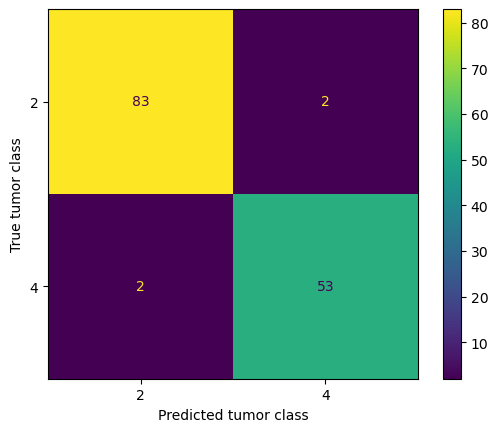

Accuracy: 96.95 %
Standard Deviation: 1.81 %


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('breast_cancer.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

np.any(np.isnan(x)) # is there any missing value in x?
## False
np.any(np.isnan(y)) # is there any missing value in y?
## False

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
 random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
LogisticRegression(C = 1.0, class_weight = None, dual = False, fit_intercept = True,
 intercept_scaling = 1, l1_ratio = None, max_iter = 100,
 multi_class = 'auto', n_jobs = None, penalty = 'l2',
 random_state = 0, solver = 'lbfgs', tol = 0.0001, verbose = 0,
 warm_start = False)

y_pred = classifier.predict(x_test)
y_pred[0:10]

comparison = np.concatenate((y_test.reshape(-1,1), y_pred.reshape(-1,1)), axis = 1) 
#comparing the real values vs predictions
comparison[0:10,:]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")
plt.show()

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))